# ENV ECON 118 / IAS 118 - Introductory Applied Econometrics Assignment 1

## Fall 2021

There is a large literature in macroeconomics that investigates why there exist such large differences in gross domestic product (GDP) per capita between developed and developing countries. Recently economists have focused on the role of agriculture in accounting for these differences (Restuccia et al. 2008, _Journal of Monetary Economics_ ). Why might agriculture be important? Consider two facts, which we will explore in greater detail below. First, labor productivity in agriculture for the richest countries is 78 times that of the poorest countries. Second, the poorest countries allocate 86% of their employment to this sector, as compared to only 4% in the richest countries.

<p style="text-align: center;"> Figure 1. </p>

<img src="fig1.png" width="400" />

<p style="text-align: center;"> Figure 2. </p>

<img src="fig2.png" width="400" />

The data are from the World Bank development indicators (http://data.worldbank.org/data-catalog/world-development-indicators) for 2019. Labor Productivity in Agriculture is measured as the output of the agricultural sector less the value of intermediate inputs, divided by the number of workers. It is measured in thousands of US $ \$ $. GDP per capita is gross domestic product divided by midyear population, and is also measured in thousands of US $ \$ $. Agricultural Employment is the percentage of all workers engaged in agriculture. The graphs above include all 94 countries in the original dataset which have data on Labor Productivity in Agriculture, Agricultural Employment and GDP per capita. The values for selected countries can be found in the csv files "countries1" and "countries2".

# Exercise 1. Relationship between GDP per capita and Labor Productivity in Agriculture

As you see in Figure 1, there appears to be some association between GDP per capita and Labor
Productivity in Agriculture.
We will estimate a simple linear relationship on a (very small) subset of 5 countries.

(a) Use R to create a scatter plot of these observations. 

a-Step 1: Load the .csv file called countries1.csv. (Hint: the `read.csv()` command will likely be helpful.)

In [1]:
pset1<-read.csv("countries1.csv")

a-Step 2: Look at the data. This dataset only has 5 rows so you can just call the entire dataset. In general you want to use the `head()` command so that R does not print the entire dataset which will take way too many pages.

In [2]:
head(pset1)

,X,gdp_pc_1000USD,lapor_prod_1000USD
,<chr>,<dbl>,<dbl>
1,Albania,5.2093628,6.134986
2,Guatemala,3.4132700,2.891942
3,Chad,0.8137199,1.536503
4,Greece,24.0242340,19.907545
5,Korea Rep,28.6057320,24.852859


a-Step 3: Rename the variables to "country", "gdp_pc", and "labor_prod". (Hint: the `colnames()` command may be useful. Also remember that to select multiple values (such as mulitple variable names, you can use R's vector notation `c()`. For example: `c("a", "b", "c")`.

In [3]:
colnames(pset1)<-c("country", "gdp_pc", "labor_prod")

a-Step 4: Create a scatterplot of the data. Make sure to (1) label the axes and their
units, and (2) title your graph. (Hint: the `plot()` command will likely come in handy. Use `help(plot)` or `?plot` to view the documentation for the function and how to include labels.)

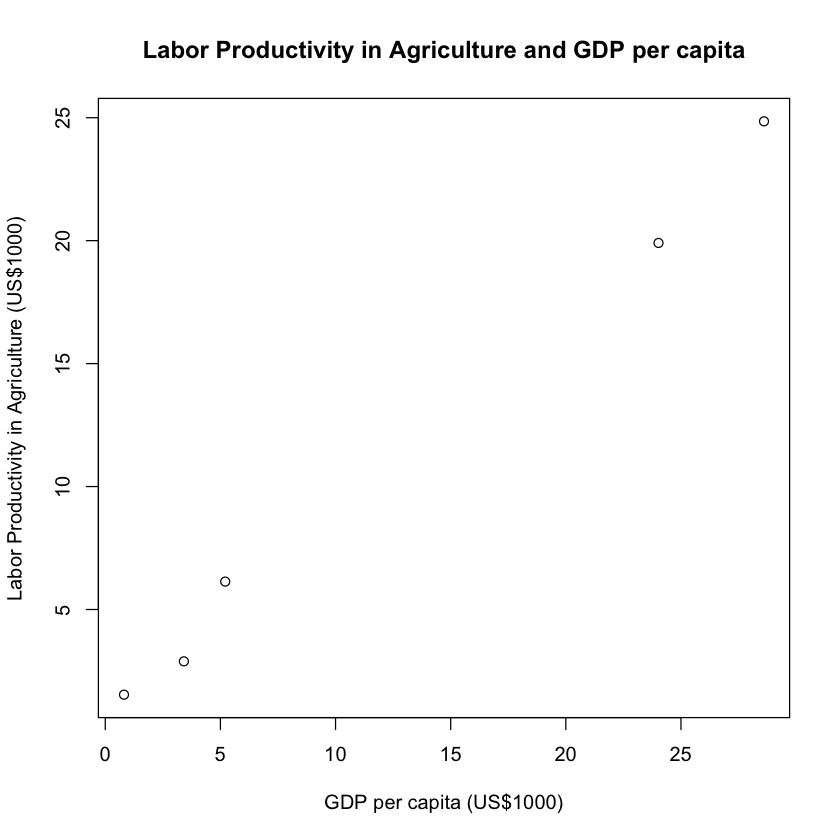

In [4]:
plot(pset1$gdp_pc, pset1$labor_prod, main="Labor Productivity in Agriculture and GDP per capita", 
     xlab="GDP per capita (US$1000)", ylab="Labor Productivity in Agriculture (US$1000)")

b) Estimate the linear relationship between GDP per capita and Labor Productivity in Agriculture ("E") by OLS, showing all intermediate calculations as we did in the handout.

$$\widehat{E} = \hat{\beta}_0 + \hat{\beta}_1GDP / cap$$

For this exercise,  **DO NOT** use the built-in R commands like `cov()` or `lm()`. Use basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to reproduce all the values from table and show all the steps.

b-Step 1: Create new data objects called  "mean_gdp_pc" and "mean_labor_prod" equal to the mean of gdp_pc and labor_prod.

In [5]:
mean_gdp_pc<-mean(pset1$gdp_pc)
mean_labor_prod<-mean(pset1$labor_prod)

b-Step 2: Calculate the covariance (only using the mathematical operations specified above) between gdp_pc and labor_prod. 
Do this by first creating two new columns of residuals: devgdp, a column that subtracts the mean_gdp_pc from gdp_pc, and devlp that subtracts the mean_labor_prod from labor_prod. 
Next create a column devgdplp which is equal to devlp multiplied by devgdp.
Finally, generate a value named "covar" which is equal to the sum of devgdplp divided by n-1.
Make sure to call covar at the end so we can see it printed in the output.

In [6]:
library(tidyverse)

pset1 <-mutate(pset1, devgdp=gdp_pc-mean_gdp_pc, devlp=labor_prod-mean_labor_prod)
pset1 <-mutate(pset1, devgdplp=devgdp*devlp)
covar <-sum(pset1$devgdplp)/(nrow(pset1)-1)
covar

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] 136.3823

In [7]:
pset1$devgdp<-pset1$gdp_pc-mean_gdp_pc
pset1$devlp<-pset1$labor_prod-mean_labor_prod
pset1$devgdplp<-pset1$devgdp*pset1$devlp

covar<-sum(pset1$devgdplp)/4
covar

[1] 136.3823

b-Step 3: Calculate the variance. First generate a column sqdev equal to the square of devgdp. Generate a value named "var" which is equal to the sum of sqdevgdp divided by n-1. Make sure to call var at the end so we can see it printed in the output.

In [8]:
pset1$sqdev<-pset1$devgdp^2

var<-sum(pset1$sqdev)/4
var

[1] 166.114

b-Step 4: Using the quantities generated above, generate and print beta_1 and beta_0, your estimates for $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [9]:
beta_1<-covar/var
beta_1

beta_0<-mean_labor_prod-(beta_1*mean_gdp_pc)
beta_0

[1] 0.8210158

[1] 0.8732812

c) Interpret the value of the estimated parameters $\hat{\beta}_0$ and $\hat{\beta}_1$

As GDP per capita rises by \\$1,000, labor productivity increases by \\$821. At a GDP per capita value of zero, our model predicts labor productivity in agriculture of \\$873. 

d) In your data frame, compute the fitted value and the residual (the difference between the actual and fitted value) for each observation. Use only basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to do this. Create a new column named "fitted" and another new column called "residuals". Call the head() of your dataset so we can see these new columns. Verify that the residuals sum to 0 (approximately).

In [10]:
pset1$fitted<-beta_0+beta_1*pset1$gdp_pc
pset1$residuals<-pset1$labor_prod-pset1$fitted
head(pset1)
sum(pset1$residuals)

,country,gdp_pc,labor_prod,devgdp,devlp,devgdplp,sqdev,fitted,residuals
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,5.2093628,6.134986,-7.203901,-4.929781,35.51366,51.89619,5.150250,0.984735309
2,Guatemala,3.4132700,2.891942,-8.999994,-8.172825,73.55537,80.99989,3.675630,-0.783687599
3,Chad,0.8137199,1.536503,-11.599544,-9.528264,110.52351,134.54942,1.541358,-0.004854587
4,Greece,24.0242340,19.907545,11.610970,8.842778,102.67323,134.81463,20.597557,-0.690012746
5,Korea Rep,28.6057320,24.852859,16.192468,13.788092,223.26325,262.19603,24.359040,0.493819624


[1] 9.769963e-15

e) Now use the `lm()` command to run this regression automatically rather than manually as you did above and save the output as "reg1". Check that your estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$ that you calculated manually above match the estimates using `lm()`. 
Call the `summary()` of reg1 so we can see the output.

In [11]:
reg1<-lm(labor_prod ~ gdp_pc, data=pset1)
summary(reg1)


Call:
lm(formula = labor_prod ~ gdp_pc, data = pset1)

Residuals:
        1         2         3         4         5 
 0.984735 -0.783688 -0.004855 -0.690013  0.493820 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.8733     0.5759   1.516 0.226701    
gdp_pc        0.8210     0.0340  24.150 0.000156 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8763 on 3 degrees of freedom
Multiple R-squared:  0.9949,	Adjusted R-squared:  0.9932 
F-statistic: 583.2 on 1 and 3 DF,  p-value: 0.0001556


f) According to the estimated relation, what is the predicted $\widehat{E}$ for a country with a GDP per capita of \$15,000?



In [12]:
est<-beta_0+beta_1*15
est

[1] 13.18852

The predicted $\hat{E}$ (estimated labor productivity per capita) when GDP per capita is \\$15,000 is \\$13,189.

g) How much of the variation in Labor Productivity in Agriculture for these 5 countries is explained by their GDP per capita?

Calculate the $R^2$ by calculating the sum of squared model residuals and the sum of squared total (variation of the dependent variable). Use only basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to do this. Then calculate $R^2$ and make sure to call the value so we can see it printed out.

In [13]:
ss_resid<-sum(pset1$resid^2)
ss_tot<-sum(pset1$devlp^2)
r_sq<-1-(ss_resid/ss_tot)
r_sq

[1] 0.9948825

Our $R^2$ is 0.99 which means that varition in GDP per capita explains nearly all of the variation in labor productivity per capita.


h) Repeat exercises (a), (b), and (e) for the additional set of countries whose data is available in the file countries2.csv.
*Note:* We outline how you might fill out the code in separate cells. If needed, click on "Insert" in the menu to add additional cells below, or simply click "b" on your keyboard while not in edit mode to add a cell below. Click "d" twice while not in edit mode to delete a cell, or go to "Edit"->"Delete Cells".

In [14]:
# (a) Steps 1-3
pset2<-read.csv("countries2.csv")
colnames(pset2)<-c("country", "gdp_pc", "labor_prod")
head(pset2)

,country,gdp_pc,labor_prod
,<chr>,<dbl>,<dbl>
1,Vietnam,2.082244,1.306463
2,Lebanon,5.858238,7.871658
3,Kenya,1.237497,1.119891
4,Mongolia,4.350162,5.443674
5,Panama,11.910155,4.429575


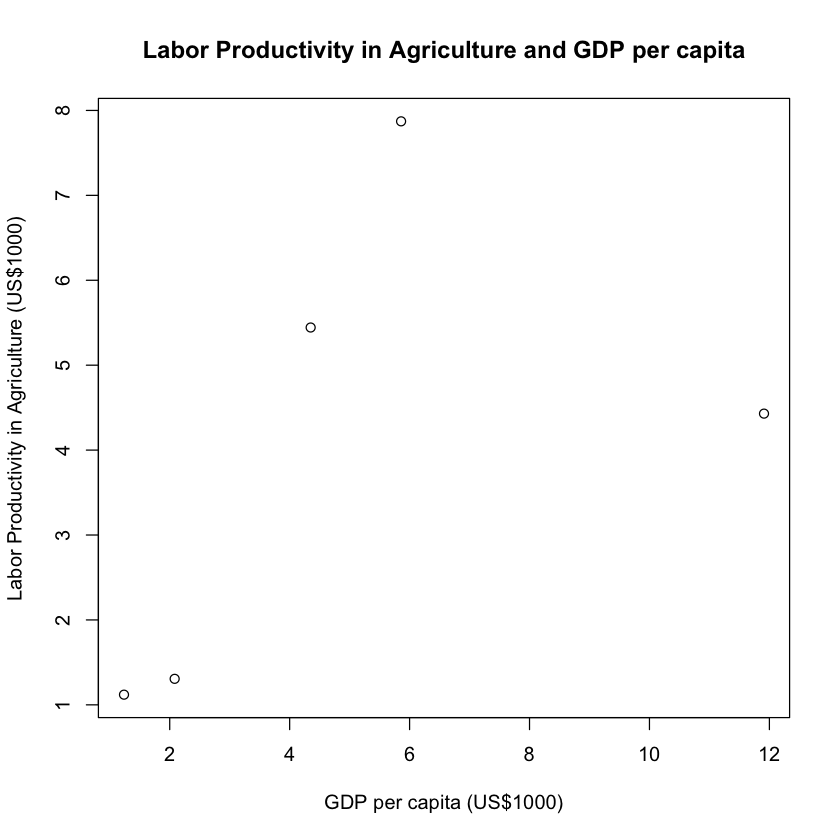

In [15]:
# (a) Step 4
plot(pset2$gdp_pc, pset2$labor_prod, main="Labor Productivity in Agriculture and GDP per capita", xlab="GDP per capita (US$1000)", ylab="Labor Productivity in Agriculture (US$1000)")

In [16]:
# (b) Steps 1-3
mean_gdp_pc2<-mean(pset2$gdp_pc)
mean_labor_prod2<-mean(pset2$labor_prod)

pset2$devgdp<-pset2$gdp_pc-mean_gdp_pc2
pset2$devlp<-pset2$labor_prod-mean_labor_prod2
pset2$devgdplp<-pset2$devgdp*pset2$devlp
covar2<-sum(pset2$devgdplp)/4
covar2

pset2$sqdev<-pset2$devgdp^2
var2<-sum(pset2$sqdev)/4
var2

[1] 6.008392

[1] 17.8851

In [17]:
# (b) Step 4
beta_1_sample2<-covar2/var2
beta_1_sample2

beta_0_sample2<-mean_labor_prod2-(beta_1_sample2*mean_gdp_pc2)
beta_0_sample2

[1] 0.3359439

[1] 2.325084

In [18]:
# (e)
reg2<-lm(labor_prod ~ gdp_pc, data=pset2)
summary(reg2)


Call:
lm(formula = labor_prod ~ gdp_pc, data = pset2)

Residuals:
     1      2      3      4      5 
-1.718  3.579 -1.621  1.657 -1.897 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.3251     2.1520    1.08    0.359
gdp_pc        0.3359     0.3394    0.99    0.395

Residual standard error: 2.871 on 3 degrees of freedom
Multiple R-squared:  0.2461,	Adjusted R-squared:  -0.005152 
F-statistic: 0.9795 on 1 and 3 DF,  p-value: 0.3953


i) How do your estimates of $\hat{\beta}_0$ and $\hat{\beta}_1$ change between the two sets of 5 countries? Discuss and briefly explain this variation in 3-5 sentences.

*In both data sets, we have a positive estimate of $\beta_0$ and a postive estimate of $\beta_1$. However, the values of the estimates are not the same; $\hat\beta_0$ in our second data set is much greater than $\hat\beta_0$ in our first data set. On the other hand, we have a larger estimate of $\beta_1$ (close to 1) in our first data set compared to the second one (less than 0.5). We can attribute these differences to variation in our samples. Both of these data sets are very small samples from the overall population of countries, and hence will yield different $\hat{\beta_0}$ and $\hat{\beta_1}$ compared to what we would estimate using the full population, or with a larger sample.*

 # Exercise 2. Regression Assumptions

Refer to the Figure 1. Suppose you wanted to estimate the relationship between GDP and Agricultural Productivity. 

a) Write down assumption SLR1.  Interpret the assumption in this context (1-3 sentences), and discuss whether you think it is likely to hold for this exersize (2-4 sentences)

*SLR1 supposes that our data generating process is linear in the parameters. This means that for some function of $x$ called $f(x)$, we can write: $y=\beta_0+\beta_1 f(x)+u$. In this context, that means we can write $E = \beta_0 + \beta_1 f(GDP / cap) + u$ for some $f(.)$. 
This seems likely to hold in this case from observation of the scatterplot in Figure 1. The relationship seems roughly linear, meaning an appropriate model is likely: $E = \beta_0 + \beta_1 f(GDP / cap) + u$, which is linear in the parameters.*


b) Write down assumption SLR4. Interpret the assumption in this context (1-3 sentences), and discuss whether you think it is likely to hold for this exersize (2-4 sentences)

*SLR 4 is the assumption of mean independence, that $E(u\vert x)=0$. In this context, this assumption would
mean that at any given GDP per capita, we would expect the modeled error on expected labor productivity in agriculture to be zero. This assumption is unlikely to hold in this context. There are likely many other omitted variables (e.g. climate, soil quality, water availability) that are correlated with labor productivity in agriculture and also correlated with GDP per capita.*

# Submission Instructions 

Go to the file dropdown menu and select the ”Download as” dropdown menu. In this menu make sure to select ”PDF via HTML” (or "PDF via Chrome" if that option appears instead). 

The figures in the problem statement may not show up in the pdf you generate. That is ok.

Once you have downloaded this pdf, make sure it shows all your answers and upload it to Gradescope.